# Ingest Data

In [3]:
import quandl
import numpy as np
import pandas as pd

df = quandl.get("WIKI/AAPL", start_date="1979-12-31", end_date="2016-12-31")

df.head()


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.427992,0.429779,0.427992,0.427992,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.407597,0.407597,0.405662,0.405662,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.377675,0.377675,0.375889,0.375889,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.385119,0.387054,0.385119,0.385119,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.396432,0.398219,0.396432,0.396432,18362400.0


# Profile Data

In [2]:
columns = df.columns.values

for column in columns:
        if column != "Date":
                print (column, df[column].max(), df[column].min(), df[column].mean())

Open 702.41 11.12 99.402023243
High 705.07 11.12 100.640431692
Low 699.57 11.0 98.0548392928
Close 702.1 11.0 99.3588249174
Volume 189560600.0 4471.0 11392656.3701
Ex-Dividend 3.29 0.0 0.00349746640229
Split Ratio 7.0 1.0 1.0009914078
Adj. Open 129.837026407 0.165539957185 17.1442830429
Adj. High 129.919107008 0.165539957185 17.3188390202
Adj. Low 127.413707108 0.163753554769 16.9516950423
Adj. Close 128.519122831 0.163753554769 17.1379211166
Adj. Volume 1855410200.0 250376.0 90726208.684


# K Nearest Neighbour(KNN)

In [3]:
%matplotlib inline 

import matplotlib.pyplot as plt
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")
X = (df.index - df.index[0]).days.reshape(-1,1)
y = df["Close"].values

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

knn = KNeighborsRegressor()
lr = KernelRidge()

lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
print ("KNN Score = ", knn.score(X_test, y_test))
print ("Kernel Ridge = ", lr.score(X_test, y_test))

KNN Score =  0.998022131965
Kernel Ridge =  0.326223184449


# Simple Linear Regression

Slope              :  [ 0.02151196]
Intercept          :  -41.5279098798
Mean squared error :  12152.523604
Variance score     :  0.348470247789


/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


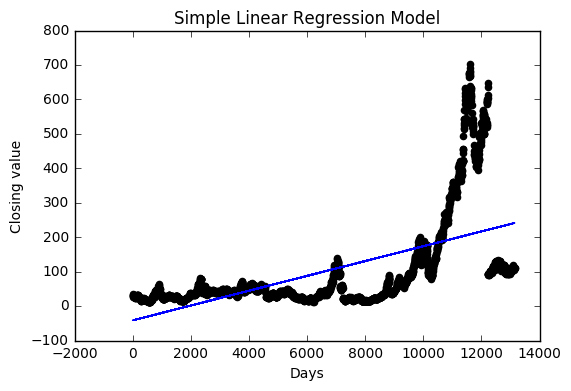

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
lm.fit(X_train , y_train)
mse1 = mean_squared_error(lm.predict(X_test),y_test)
mse1_train = mean_squared_error(lm.predict(X_train),y_train)
Score_test = lm.score(X_test, y_test)

print ("Slope              : ",lm.coef_) 
print ("Intercept          : ",lm.intercept_)
print ("Mean squared error : ", mse1)
print ("Variance score     : ",Score_test)
plt.scatter(X_test, y_test,color='black')
plt.plot(X_test,lm.predict(X_test),color='blue')
plt.title('Simple Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('Closing value')
plt.show()

# Linear Regression Lasso

Slope              :  [ 0.02151189]
Intercept          :  -41.5274538212
Mean squared error :  12152.5229919
Variance score     :  0.348470247789


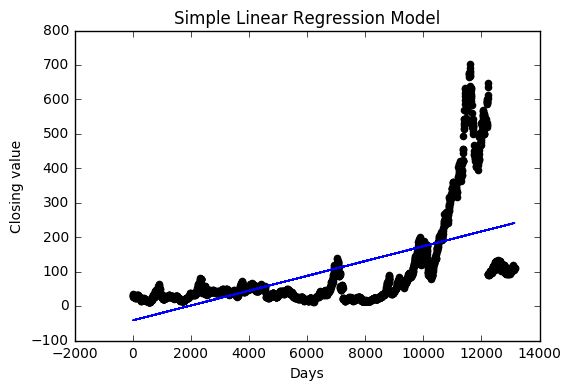

In [5]:
from sklearn import linear_model as lm
regr = lm.Lasso()
scores = [regr.fit(X_train, y_train
            ).score(X_test, y_test)]

regr.fit(X_train, y_train)
mse1 = mean_squared_error(regr.predict(X_test),y_test)
mse1_train = mean_squared_error(regr.predict(X_train),y_train)
print ("Slope              : ",regr.coef_) 
print ("Intercept          : ",regr.intercept_)
print ("Mean squared error : ", mse1)
print ("Variance score     : ",Score_test)
plt.scatter(X_test, y_test,color='black')
plt.plot(X_test,regr.predict(X_test),color='blue')
plt.title('Simple Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('Closing value')
plt.show()

## Transforming features to generate new features
New features now include: 
 * Volatility/Spread (HL_PCT)
 * Percentage change daily (PCT_change)
 * Adj. Volume

Target is Adj. Close

The models used to predict:
* Linear Regression
* kNearest Neighbour
* Kernel Ridge

 

/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

Linear Regression score:  0.967726294823
Linear Regression MSE:  32.4208123139


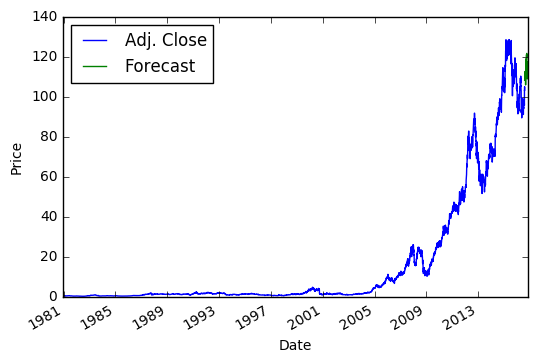

KNN Score:  0.974571136109
KNN MSE:  25.5447714798
Kernel Ridge Score:  0.633629982486
Kernel Ridge MSE:  368.039972793


In [7]:
import math
import datetime

from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error

new_df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
new_df['HL_PCT'] = (new_df['Adj. High'] - new_df['Adj. Low']) / new_df['Adj. Close'] * 100.0
new_df['PCT_change'] = (new_df['Adj. Close'] - new_df['Adj. Open']) / new_df['Adj. Open'] * 100.0
new_df = new_df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
new_df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(new_df)))
new_df['label'] = new_df[forecast_col].shift(-forecast_out)

X = np.array(new_df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

new_df.dropna(inplace=True)

y = np.array(new_df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

forecast_set = clf.predict(X_lately)
new_df['Forecast'] = np.nan

last_date = new_df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    new_df.loc[next_date] = [np.nan for _ in range(len(new_df.columns)-1)]+[i]
    

print("Linear Regression score: ", confidence)
print("Linear Regression MSE: ", mean_squared_error(clf.predict(X_test), y_test))

new_df['Adj. Close'].plot()
new_df['Forecast'].plot()
plt.legend(loc=0)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

print("KNN Score: ", knn.score(X_test, y_test))
print("KNN MSE: ", mean_squared_error(knn.predict(X_test), y_test))

kr = KernelRidge()
kr.fit(X_train, y_train)
print("Kernel Ridge Score: ", kr.score(X_test, y_test))
print("Kernel Ridge MSE: ", mean_squared_error(kr.predict(X_test), y_test))

# ARIMA MODEL

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [5]:
df.index = pd.to_datetime(df.index, format="%Y-%m")
df.index
df.dropna()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.750,28.870,28.7500,28.7500,2093900.0,0.0,1.0,0.427992,0.429779,0.427992,0.427992,117258400.0
1980-12-15,27.380,27.380,27.2500,27.2500,785200.0,0.0,1.0,0.407597,0.407597,0.405662,0.405662,43971200.0
1980-12-16,25.370,25.370,25.2500,25.2500,472000.0,0.0,1.0,0.377675,0.377675,0.375889,0.375889,26432000.0
1980-12-17,25.870,26.000,25.8700,25.8700,385900.0,0.0,1.0,0.385119,0.387054,0.385119,0.385119,21610400.0
1980-12-18,26.630,26.750,26.6300,26.6300,327900.0,0.0,1.0,0.396432,0.398219,0.396432,0.396432,18362400.0
1980-12-19,28.250,28.380,28.2500,28.2500,217100.0,0.0,1.0,0.420549,0.422484,0.420549,0.420549,12157600.0
1980-12-22,29.630,29.750,29.6300,29.6300,166800.0,0.0,1.0,0.441093,0.442879,0.441093,0.441093,9340800.0
1980-12-23,30.880,31.000,30.8800,30.8800,209600.0,0.0,1.0,0.459701,0.461487,0.459701,0.459701,11737600.0
1980-12-24,32.500,32.630,32.5000,32.5000,214300.0,0.0,1.0,0.483817,0.485753,0.483817,0.483817,12000800.0


In [6]:
ts = df['Close']

ts.head()

Date
1980-12-12    28.75
1980-12-15    27.25
1980-12-16    25.25
1980-12-17    25.87
1980-12-18    26.63
Name: Close, dtype: float64

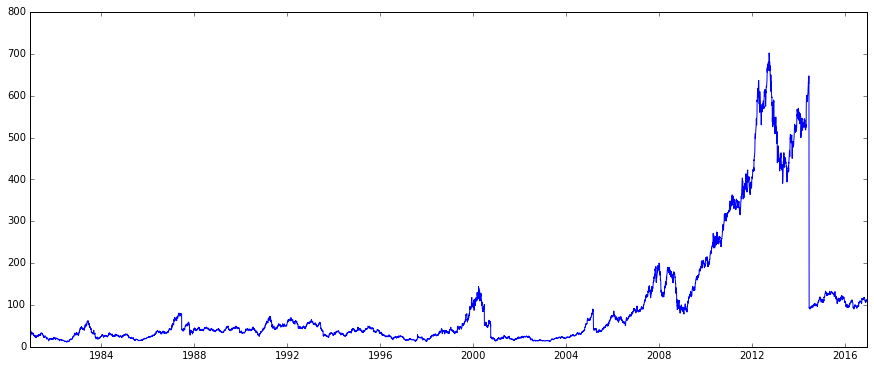

In [7]:
plt.plot(ts)

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=432)
    rolstd = pd.rolling_std(timeseries, window=432)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\MonilShah\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=432,center=False).mean()
C:\Users\MonilShah\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=432,center=False).std()


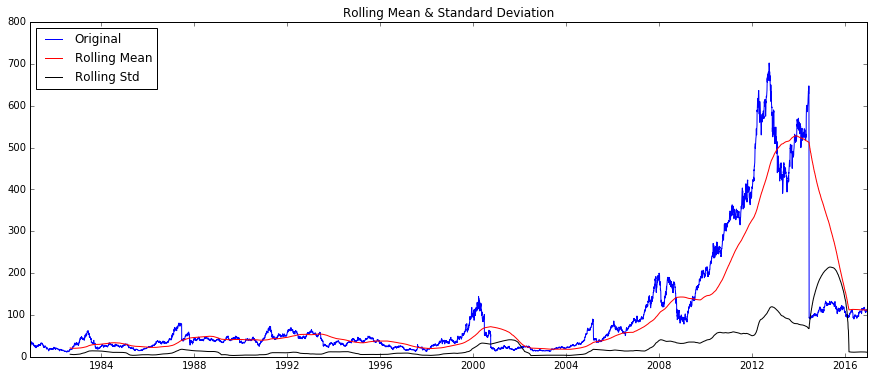

Results of Dickey-Fuller Test:
Test Statistic                   -2.342338
p-value                           0.158676
#Lags Used                        0.000000
Number of Observations Used    9077.000000
Critical Value (10%)             -2.566940
Critical Value (5%)              -2.861858
Critical Value (1%)              -3.431071
dtype: float64


In [9]:
test_stationarity(ts)

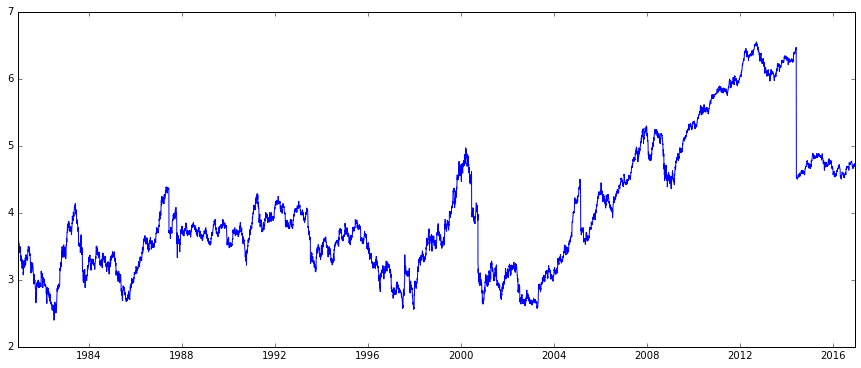

In [10]:
ts_log = np.log(ts)
plt.plot(ts_log)

C:\Users\MonilShah\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=432,center=False).mean()
  if __name__ == '__main__':


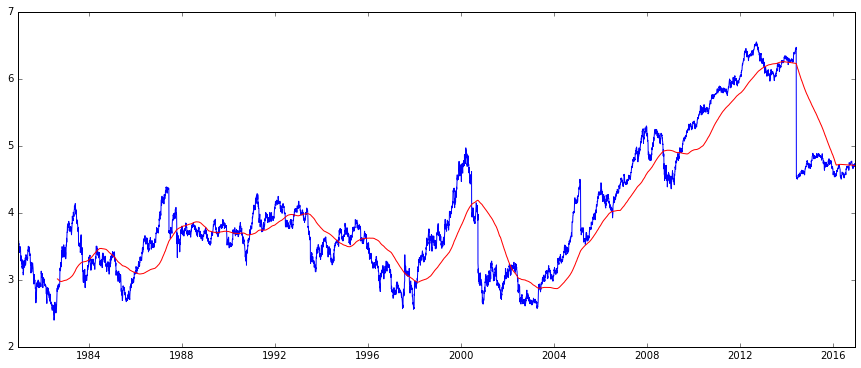

In [11]:
moving_avg = pd.rolling_mean(ts_log,432)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [15]:
ts_log_moving_avg_diff = ts_log - moving_avg


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=432).mean()
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=432).std()


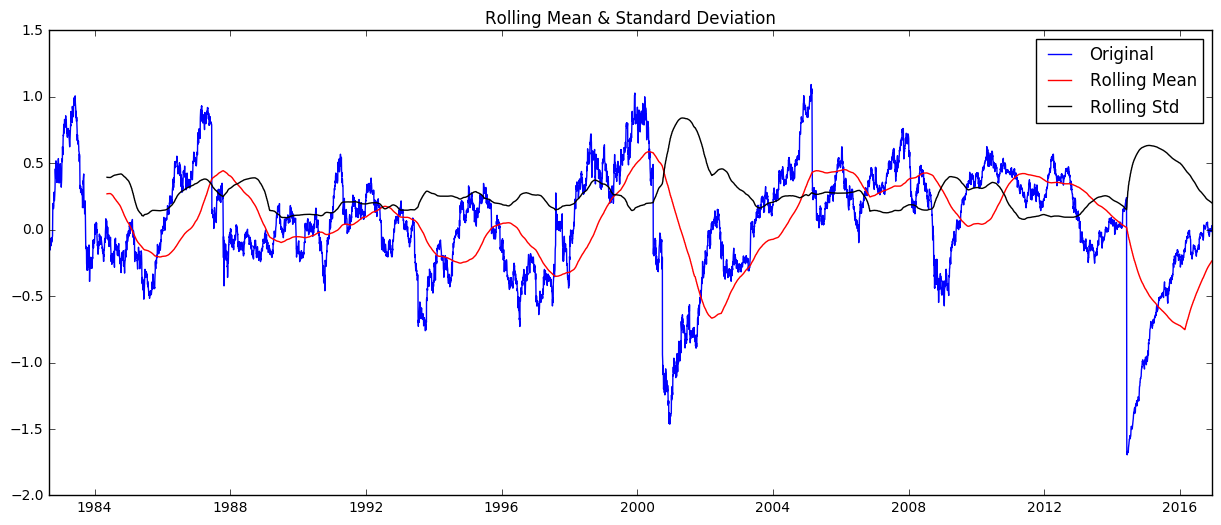

Results of Dickey-Fuller Test:
Test Statistic                   -4.142572
p-value                           0.000823
#Lags Used                        4.000000
Number of Observations Used    8642.000000
Critical Value (1%)              -3.431107
Critical Value (5%)              -2.861875
Critical Value (10%)             -2.566948
dtype: float64


In [17]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,min_periods=0,halflife=432).mean()
  if __name__ == '__main__':


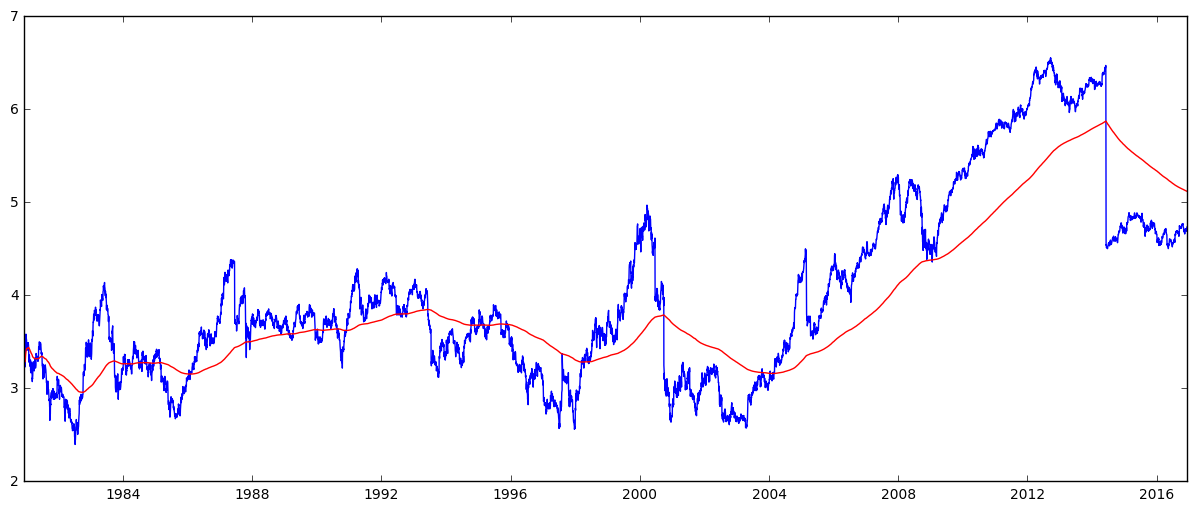

In [18]:
expwighted_avg = pd.ewma(ts_log, halflife=432)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=432).mean()
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=432).std()


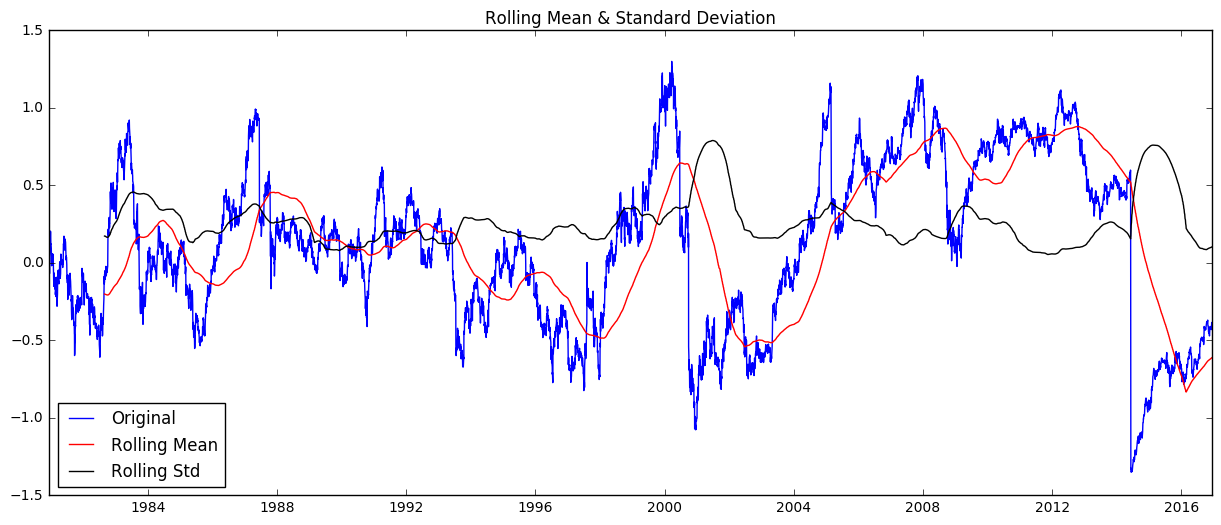

Results of Dickey-Fuller Test:
Test Statistic                   -3.386775
p-value                           0.011418
#Lags Used                        4.000000
Number of Observations Used    9073.000000
Critical Value (1%)              -3.431071
Critical Value (5%)              -2.861859
Critical Value (10%)             -2.566940
dtype: float64


In [19]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

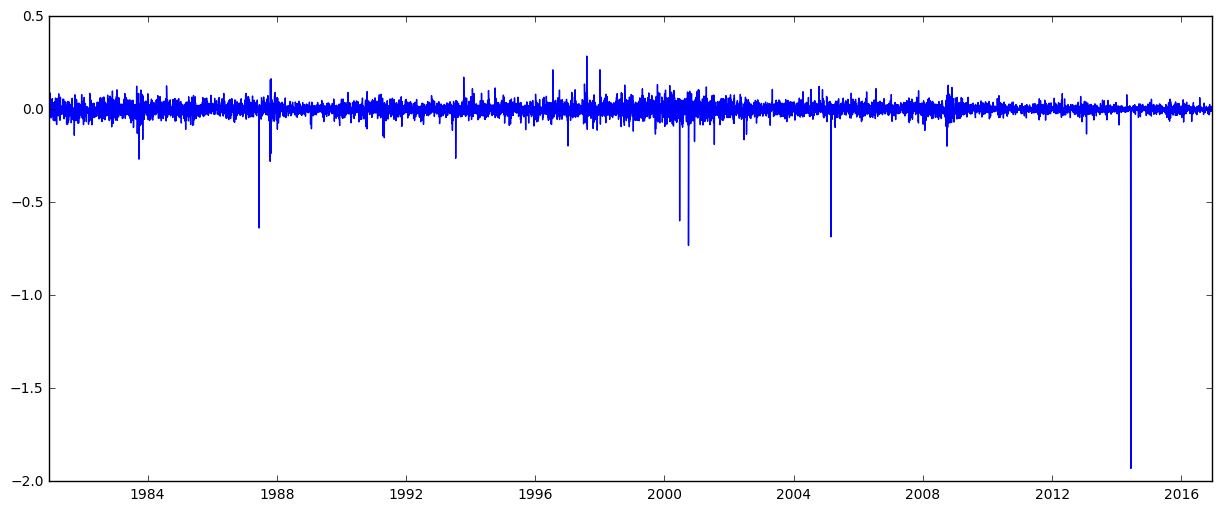

In [20]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=432).mean()
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=432).std()


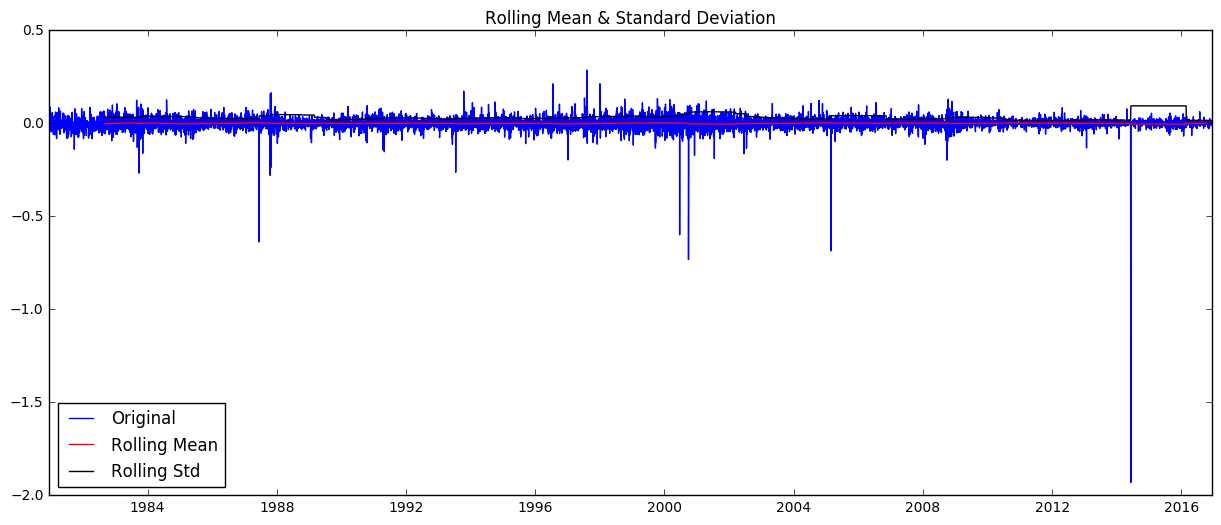

Results of Dickey-Fuller Test:
Test Statistic                  -47.656371
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    9073.000000
Critical Value (1%)              -3.431071
Critical Value (5%)              -2.861859
Critical Value (10%)             -2.566940
dtype: float64


In [21]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

/usr/local/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


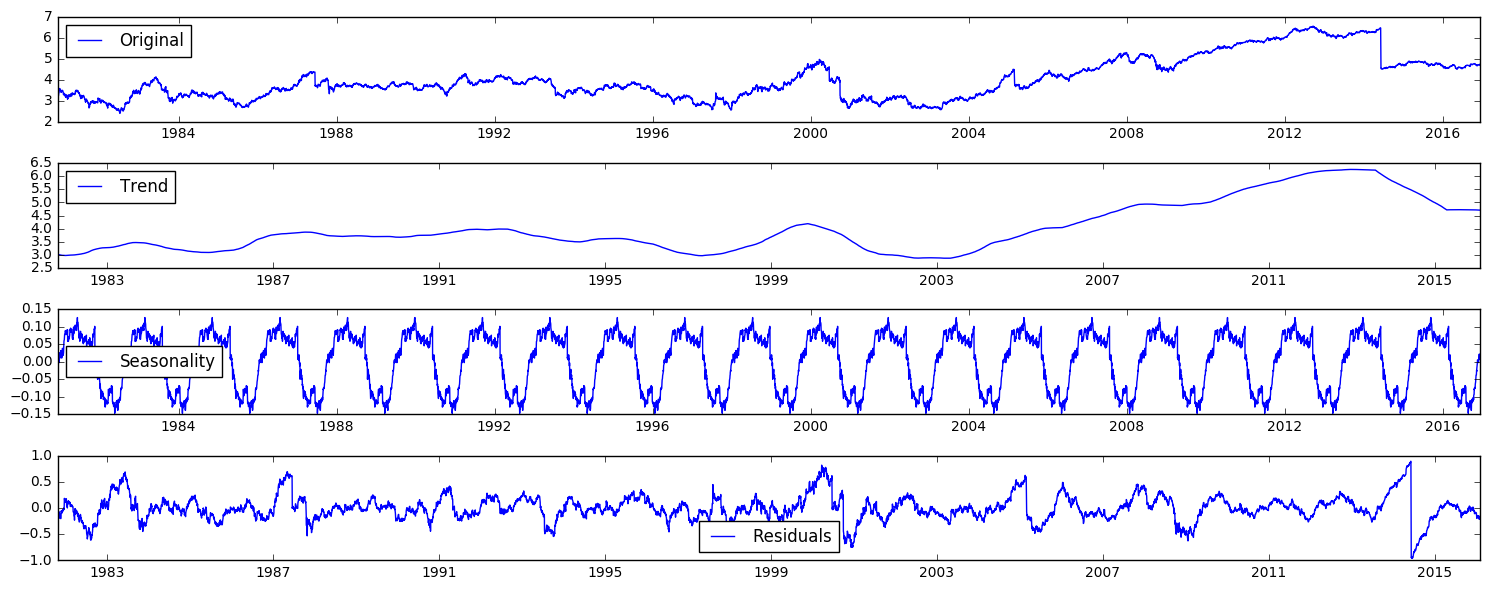

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=432)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=432).mean()
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=432).std()


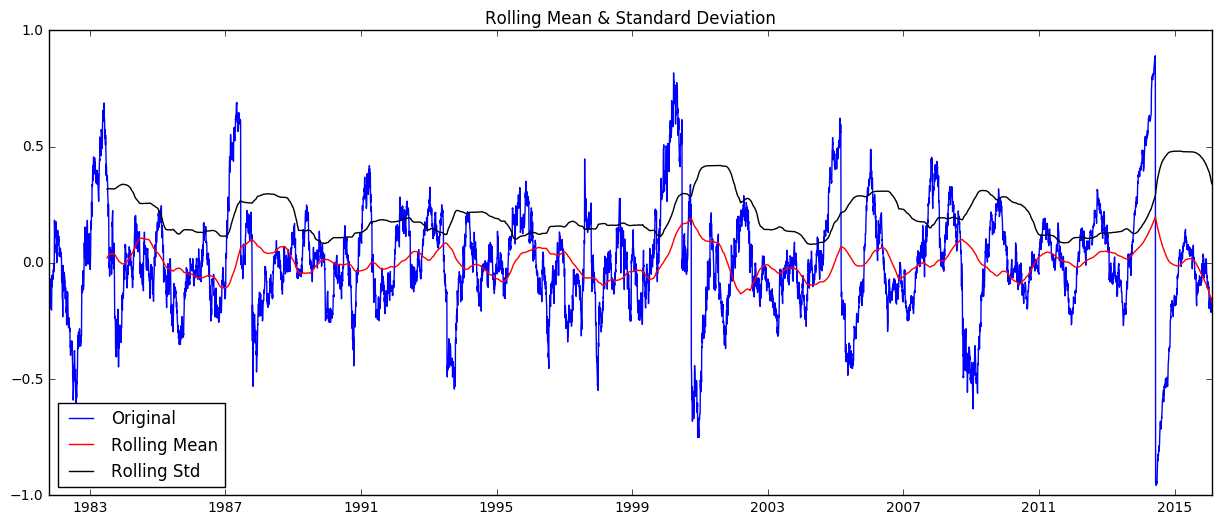

Results of Dickey-Fuller Test:
Test Statistic                -7.616439e+00
p-value                        2.185520e-11
#Lags Used                     6.000000e+00
Number of Observations Used    8.639000e+03
Critical Value (1%)           -3.431107e+00
Critical Value (5%)           -2.861875e+00
Critical Value (10%)          -2.566948e+00
dtype: float64


In [23]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# Stock Forecasting using ARIMA model

In [24]:
from statsmodels.tsa.stattools import acf, pacf

In [25]:
lag_acf = acf(ts_log_diff, nlags=50)
lag_pacf = pacf(ts_log_diff, nlags=50, method='ols')

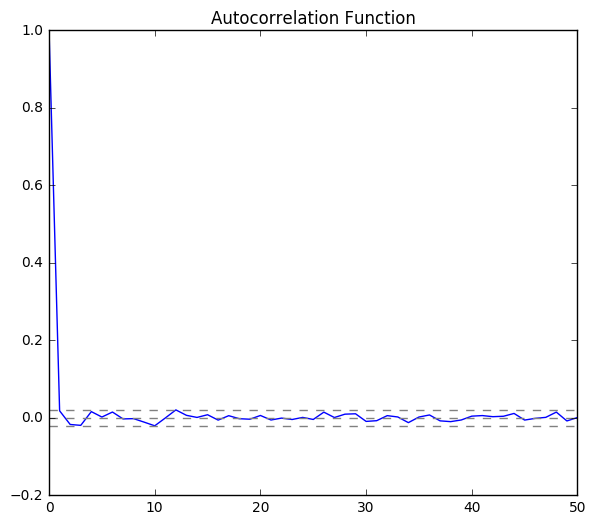

In [26]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

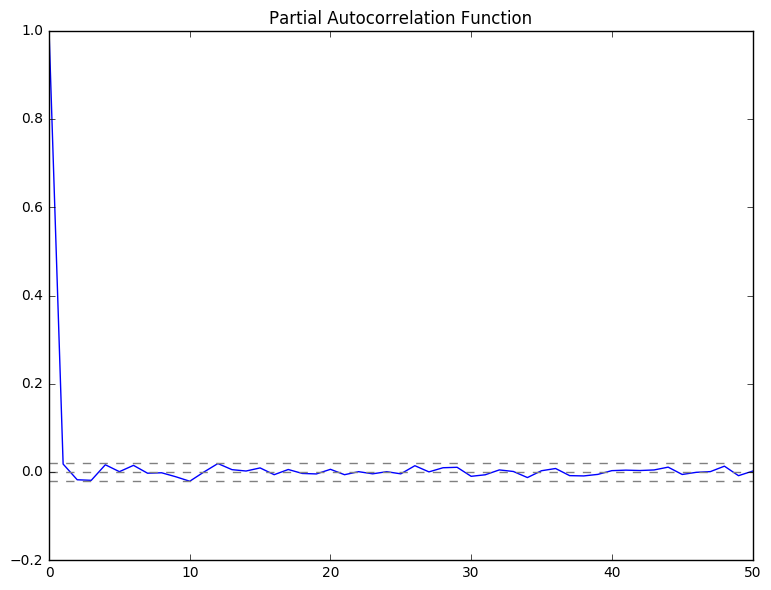

In [27]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

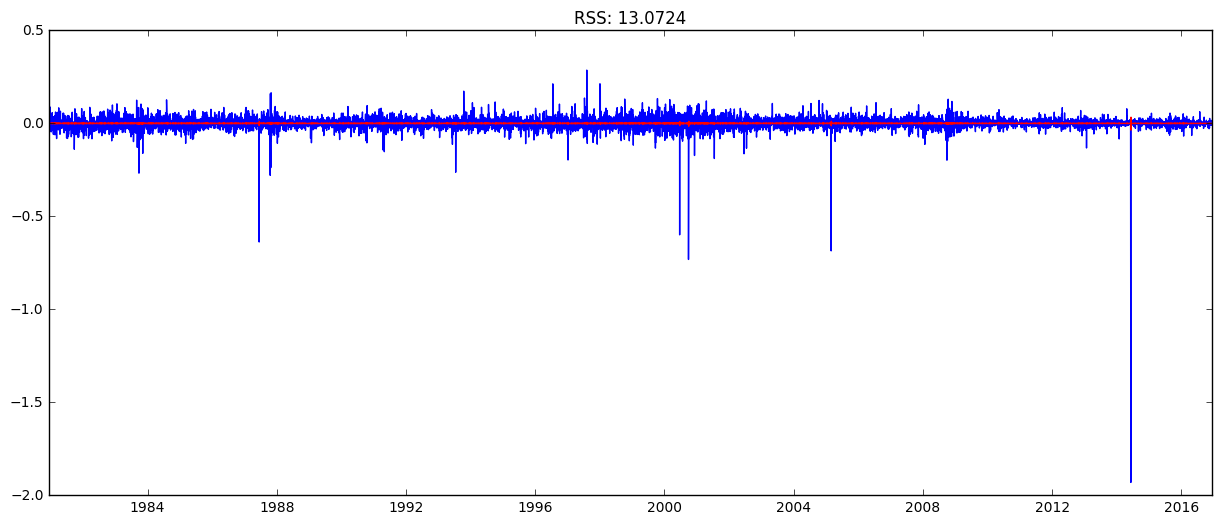

In [28]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2, 1, 0),freq='B')  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

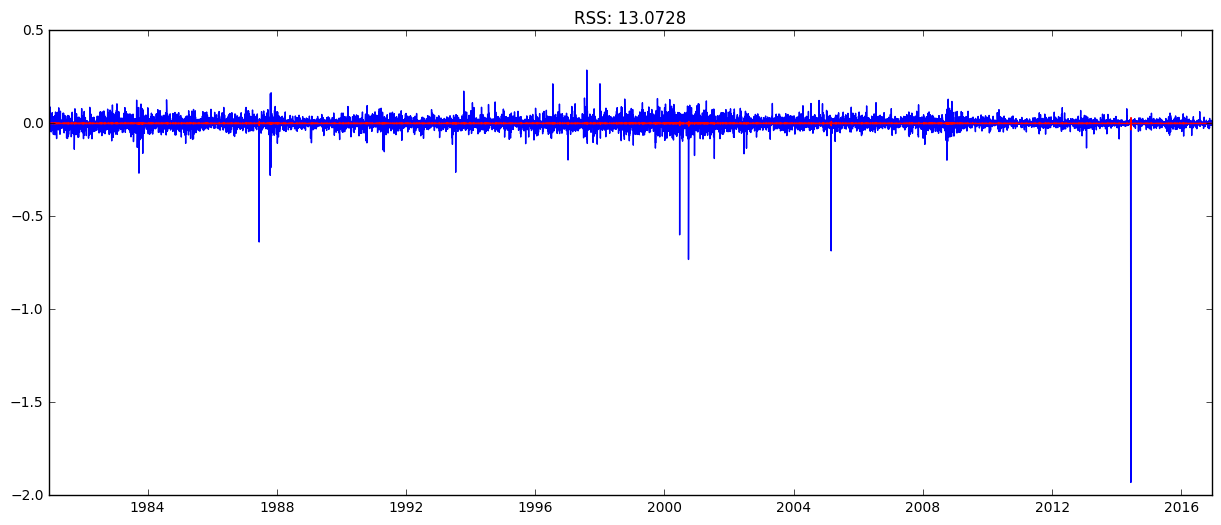

In [29]:
model = ARIMA(ts_log, order=(0, 1, 2), freq = 'B')  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

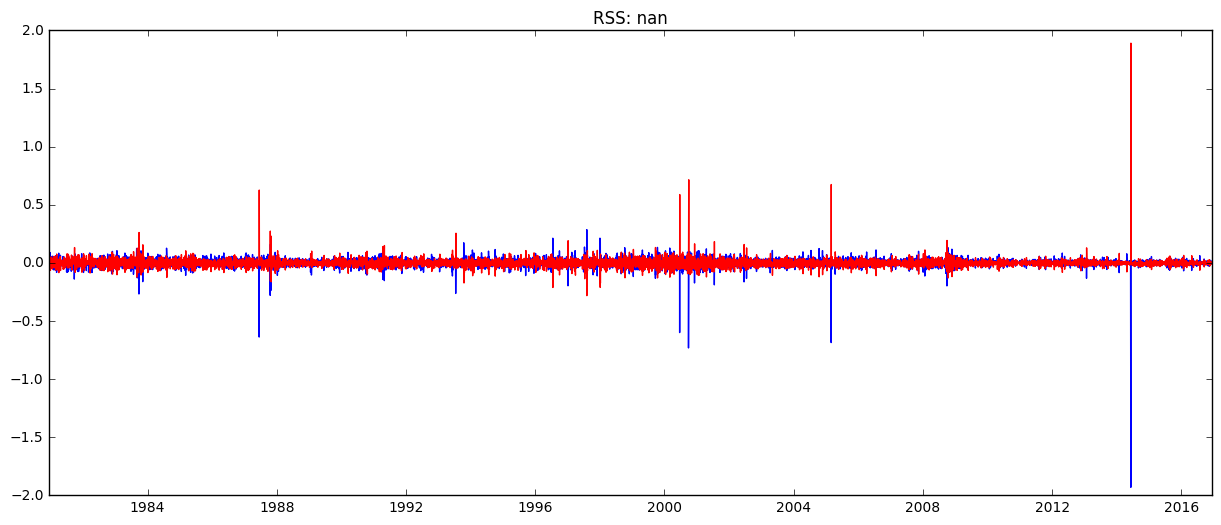

In [30]:
model = ARIMA(ts_log, order=(2, 2, 2), freq ='B')  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [31]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
1980-12-16    4.695843e-08
1980-12-17    1.112986e-02
1980-12-18   -5.820550e-02
1980-12-19   -4.722789e-02
1980-12-22   -6.145846e-02
dtype: float64


In [32]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
1980-12-16    4.695843e-08
1980-12-17    1.112990e-02
1980-12-18   -4.707559e-02
1980-12-19   -9.430348e-02
1980-12-22   -1.557619e-01
dtype: float64


In [33]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
1980-12-12    3.358638
1980-12-15    3.358638
1980-12-16    3.358638
1980-12-17    3.369768
1980-12-18    3.311562
dtype: float64

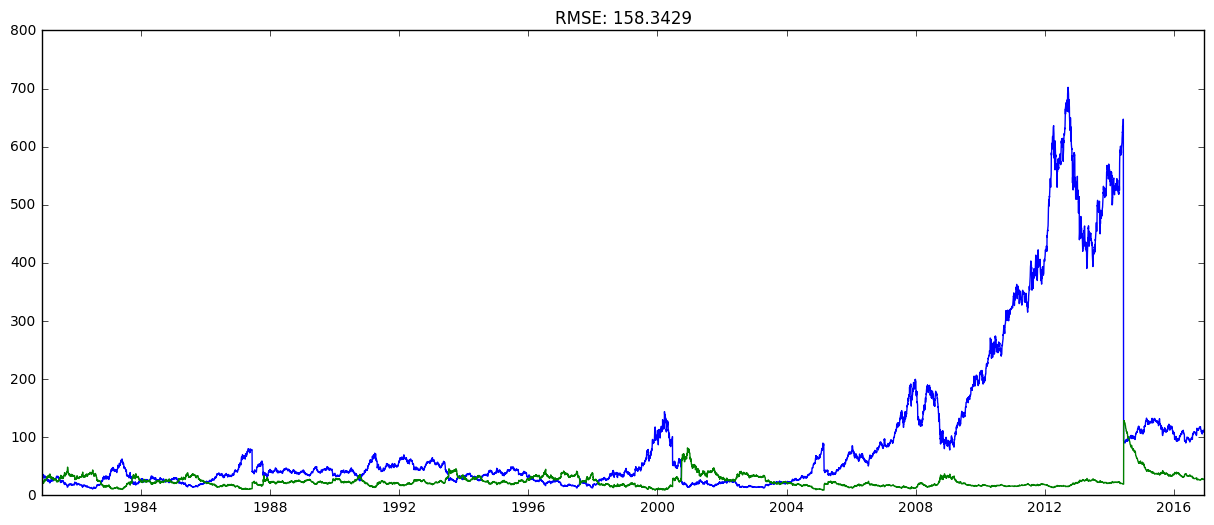

In [34]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))